In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# Data loading and cleaning

## Loading

In [2]:
df_list_PL = [pd.read_csv('../data/PREMIER_LEAGUE/PL_'+str(year)+'.csv') for year in np.arange(2013,2019)]
df_list_E1 = [pd.read_csv('../data/CHAMPIONSHIP/E1_'+str(year)+'.csv') for year in np.arange(2013,2019)]
df_list_E2 = [pd.read_csv('../data/LEAGUE1/E2_'+str(year)+'.csv') for year in np.arange(2013,2019)]
df_list = df_list_PL + df_list_E1 + df_list_E2
data = pd.concat(df_list, ignore_index=True, sort=False)
# Convert date to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date',inplace=True)
data.reset_index(drop=True,inplace=True)

In [3]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E1,2012-01-09,Hull,Bolton,3.0,1.0,H,1.0,1.0,D,...,1.64,20.0,0.00,1.80,1.76,2.16,2.08,2.54,3.35,3.03
1,E2,2012-01-09,Yeovil,Doncaster,2.0,1.0,H,0.0,0.0,D,...,1.90,18.0,0.00,1.76,1.71,2.25,2.18,2.21,3.47,3.44
2,E2,2012-01-09,Walsall,Brentford,2.0,2.0,D,2.0,0.0,H,...,1.66,18.0,0.00,2.28,2.19,1.75,1.70,3.51,3.29,2.29
3,E2,2012-01-09,Tranmere,Colchester,4.0,0.0,H,1.0,0.0,H,...,1.65,16.0,-0.50,2.04,1.98,1.92,1.88,2.10,3.46,3.86
4,E2,2012-01-09,Sheffield United,Bournemouth,5.0,3.0,H,3.0,1.0,H,...,1.87,16.0,-0.75,2.25,2.19,1.77,1.72,1.93,3.62,4.34


## Cleaning

We identify the feature with more than 10% of Nan and we remove them

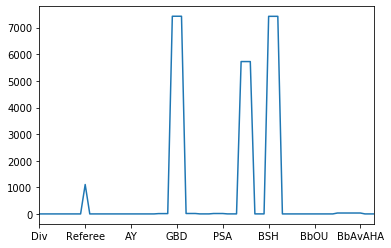

In [4]:
data.isnull().sum().plot()

In [5]:
# Feature with more than 10% of NaN
NaN_feature = data.isnull().sum()[data.isnull().sum()>0.10*len(data)].index

# Drop them
data.drop(columns = NaN_feature, inplace=True)

We drop row (match) for wich there is still Nan in the feature

In [6]:
# Drop row with nan
data.dropna(axis=0,how='any',inplace=True)

data.isnull().sum().sum()

0

# Exploratory Data Analysis

## Description of variables

In [7]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8826 entries, 0 to 8903
Data columns (total 64 columns):
Div         8826 non-null object
Date        8826 non-null datetime64[ns]
HomeTeam    8826 non-null object
AwayTeam    8826 non-null object
FTHG        8826 non-null float64
FTAG        8826 non-null float64
FTR         8826 non-null object
HTHG        8826 non-null float64
HTAG        8826 non-null float64
HTR         8826 non-null object
HS          8826 non-null float64
AS          8826 non-null float64
HST         8826 non-null float64
AST         8826 non-null float64
HF          8826 non-null float64
AF          8826 non-null float64
HC          8826 non-null float64
AC          8826 non-null float64
HY          8826 non-null float64
AY          8826 non-null float64
HR          8826 non-null float64
AR          8826 non-null float64
B365H       8826 non-null float64
B365D       8826 non-null float64
B365A       8826 non-null float64
BWH         8826 non-null float64
BWD    


Key to results data:

- Div = League Division
- Date = Match Date (dd/mm/yy)
- HomeTeam = Home Team
- AwayTeam = Away Team
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full Time Away Team Goals
- FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG = Half Time Home Team Goals
- HTAG = Half Time Away Team Goals
- HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics 

- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HC = Home Team Corners
- AC = Away Team Corners
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
- HR = Home Team Red Cards
- AR = Away Team Red Cards


Home win, Draw, or Away win betting odds:

- B365H = Bet365 home win odds
- B365D = Bet365 draw odds
- B365A = Bet365 away win odds
- BWH = Bet&Win home win odds
- BWD = Bet&Win draw odds
- BWA = Bet&Win away win odds
- IWH = Interwetten home win odds
- IWD = Interwetten draw odds
- IWA = Interwetten away win odds
- LBH = Ladbrokes home win odds
- LBD = Ladbrokes draw odds
- LBA = Ladbrokes away win odds
- PSH = Pinnacle home win odds
- PSD = Pinnacle draw odds
- PSA = Pinnacle away win odds
- VCH = VC Bet home win odds
- VCD = VC Bet draw odds
- VCA = VC Bet away win odds
- WHH = William Hill home win odds
- WHD = William Hill draw odds
- WHA = William Hill away win odds
- PSCH = Unknown bookie home win odds
- PSCD = Unknown bookie draw odds
- PSCA = Unknown bookie away win odds



- Bb1X2 = Number of BetBrain bookmakers used to calculate match odds averages and maximums
- BbMxH = Betbrain maximum home win odds
- BbAvH = Betbrain average home win odds
- BbMxD = Betbrain maximum draw odds
- BbAvD = Betbrain average draw win odds
- BbMxA = Betbrain maximum away win odds
- BbAvA = Betbrain average away win odds

goals betting odds:

- BbOU = Number of BetBrain bookmakers used to calculate over/under 2.5 goals (total goals) averages and maximums
- BbMx>2.5 = Betbrain maximum over 2.5 goals
- BbAv>2.5 = Betbrain average over 2.5 goals
- BbMx<2.5 = Betbrain maximum under 2.5 goals
- BbAv<2.5 = Betbrain average under 2.5 goals

Asian handicap betting odds:

- BbAH = Number of BetBrain bookmakers used to Asian handicap averages and maximums
- BbAHh = Betbrain size of handicap (home team)
- BbMxAHH = Betbrain maximum Asian handicap home team odds
- BbAvAHH = Betbrain average Asian handicap home team odds
- BbMxAHA = Betbrain maximum Asian handicap away team odds
- BbAvAHA = Betbrain average Asian handicap away team odds

In [8]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,...,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000
mean,1.459551,1.164287,0.635962,0.505665,13.287673,10.803875,5.022774,4.096760,10.737933,11.376388,...,1.879688,22.306934,-0.276569,1.994662,1.931123,1.986235,1.923235,2.582182,3.790343,4.071720
std,1.235640,1.103062,0.805459,0.710122,5.064777,4.429869,2.737846,2.368858,3.480823,3.637383,...,0.228336,4.808532,0.570114,0.145208,0.134879,0.144453,0.133813,1.217281,0.804906,2.603657
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.400000,9.000000,-2.750000,1.600000,1.520000,1.580000,1.540000,1.080000,2.820000,1.160000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,9.000000,...,1.730000,18.000000,-0.500000,1.890000,1.830000,1.880000,1.830000,1.870000,3.400000,2.640000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,5.000000,4.000000,11.000000,11.000000,...,1.840000,22.000000,-0.250000,1.990000,1.920000,1.980000,1.920000,2.290000,3.560000,3.375000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,7.000000,5.000000,13.000000,14.000000,...,1.980000,26.000000,0.000000,2.090000,2.020000,2.080000,2.010000,2.870000,3.850000,4.550000
max,8.000000,8.000000,6.000000,4.000000,43.000000,35.000000,20.000000,20.000000,26.000000,26.000000,...,4.070000,37.000000,2.000000,2.690000,2.500000,2.800000,2.690000,18.000000,15.000000,30.000000


In [9]:
data.describe(include=['O'])

,Div,HomeTeam,AwayTeam,FTR,HTR
count,8826,8826,8826,8826,8826
unique,3,82,82,3,3
top,E1,Ipswich,Preston,H,D
freq,3295,138,138,3838,3714


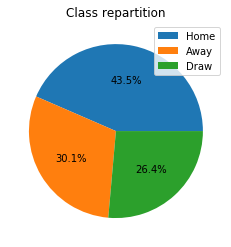

In [10]:
y = data['FTR']
plt.pie(y.value_counts(),autopct='%1.1f%%')
plt.legend(['Home','Away','Draw'])
plt.title('Class repartition')
plt.show()

## Feature Engineering

First, we know that the probability $P$ of the different outcomes (A, H, D) implied by the odds $\pi$ of the bookmaker will be proportional in first approximation to the inverse of the odds:
$$ \pi = \frac{1}{P} - \alpha\quad\Leftrightarrow P=\frac{1}{\pi+\alpha}\simeq\frac{1}{\pi}+\frac{\alpha}{\pi^2}+O(\alpha^2) $$
Hence the first feature engineering simply consist in inverting the odds in order to capture this non linearity.

Then, based on the same logic, we create three additional features (one for each outcome). Indeed, we know that the  more $1/\pi$ is small, the more the approximation $P\simeq\frac{1}{\pi}$ will be correct due to the vanishing second term. Hence we create 3 additional column that contains the smallest inverse odd $1/\pi$ for each outcome among all the odds offered by the bookmaker for each game.

As far as the match statistics are concerned, at time $t$ we can only use information available at time $t$, that is why we use past data to create new features for each team for each match using past data. These are constructed using exponentially moving average in order to capture a form of momentum in the statistic. This way, we put more weight on recent data, as we suppose their are more relevant. This kind of momentum is defined for each team individually. 

The last feature added, reflects the momentum in the history of results of confrontations between two teams. Contrary to the mometum defined just before that is specific to each team, here it is defined for each couple of team. It is a exponentially moving average on the results of past confrontation between two given teams.

In [11]:

odds_columns = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
                'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']
goal_odds_columns = ['BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5','BbAv<2.5']
Asian_odds_columns = ['BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA']
Stat_columns = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS','HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']


# Take the inverse of odds \equiv implied prob
data[odds_columns] = data[odds_columns].apply(lambda x:1./x).replace(np.inf,np.nan)
# remove infinite
data.dropna(axis=0, how='any',inplace=True)
# Reset again index in order to avoid hole
data.reset_index(drop=True,inplace=True)

# add implied proba min
H_odds_columns = [column for column in odds_columns if column[-1]=='H']
D_odds_columns = [column for column in odds_columns if column[-1]=='D']
A_odds_columns = [column for column in odds_columns if column[-1]=='A']


data['H_proba_min'] = data[H_odds_columns].min(axis=1)
data['D_proba_min'] = data[D_odds_columns].min(axis=1)
data['A_proba_min'] = data[A_odds_columns].min(axis=1)

data.drop(['Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD','BbMxA', 'BbAvA'], axis=1, inplace=True)



#Momentum in stat and victory

data_mom = data[['Date','HomeTeam','AwayTeam']+Stat_columns]

data_victory = data[['Date','HomeTeam','AwayTeam','FTR']]

Home_columns = ['FTHG', 'HTHG', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR']
Away_columns = ['FTAG', 'HTAG', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR']

def Momentum(data_past,team):
    new_columns = ['Date', 'FTG', 'HTG', 'S', 'ST', 'F', 'C', 'Y', 'R']
    Home_columns = ['FTHG', 'HTHG', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR']
    Away_columns = ['FTAG', 'HTAG', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR']
    data_past_H = data_past[data_past['HomeTeam'] == team][['Date']+Home_columns]
    data_past_H.columns = new_columns
    data_past_A = data_past[data_past['AwayTeam'] == team][['Date']+Away_columns]
    data_past_A.columns = new_columns
    mom_df = pd.merge_ordered(data_past_H,data_past_A).ewm(span=10).mean()
    if mom_df.empty:
        mom_df.loc[0,mom_df.columns] = np.nan
    match_nbr = data_past_H.shape[0] + data_past_A.shape[0]
    return mom_df.iloc[-1,:], match_nbr


def VictoryHistory(data_victory_past,team1,team2):
    victories = list()
    draws = list()

    victories += (data_victory_past[(data_victory_past['HomeTeam'] == team1)
                                        & (data_victory_past['AwayTeam'] == team2)]['FTR']=='H').tolist()
    draws += ((data_victory_past[(data_victory_past['HomeTeam'] == team1)
                                        & (data_victory_past['AwayTeam'] == team2)]['FTR']=='D').tolist())

    victories += ((data_victory_past[(data_victory_past['HomeTeam'] == team2)
                                        & (data_victory_past['AwayTeam'] == team1)]['FTR']=='A').tolist())
    draws += ((data_victory_past[(data_victory_past['HomeTeam'] == team2)
                                        & (data_victory_past['AwayTeam'] == team1)]['FTR']=='D').tolist())
    confrontation_nbr = len(victories)

    if confrontation_nbr == 0:
        victory_mom = 0
        draw_mom =0
    else:
        victory_mom = pd.Series(victories).ewm(5).mean().iloc[-1]
        draw_mom = pd.Series(draws).ewm(5).mean().iloc[-1]
    return victory_mom,draw_mom,confrontation_nbr

data[Stat_columns] = np.nan
data['match_nbr_home'] = np.nan
data['match_nbr_away'] = np.nan
data['H_vict_mom'] = np.nan
data['D_mom'] = np.nan
data['confrontation_nbr'] = np.nan

for i in range(1,data.shape[0]):
    data_mom_past = data_mom.iloc[:i]
    momH, match_nbr_home = Momentum(data_mom_past,data['HomeTeam'][i])
    data.loc[i,Home_columns] = momH.values
    data.loc[i, 'match_nbr_home'] = match_nbr_home

    momA, match_nbr_Away = Momentum(data_mom_past, data['AwayTeam'][i])
    data.loc[i, Away_columns] = momA.values
    data.loc[i, 'match_nbr_away'] = match_nbr_Away

    data_victory_past = data_victory.iloc[:i]
    H_vict_mom,D_mom,confrontation_nbr = VictoryHistory(data_victory_past,data['HomeTeam'][i],data['AwayTeam'][i])
    data.loc[i, 'H_vict_mom'] = H_vict_mom
    data.loc[i, 'D_mom'] = D_mom
    data.loc[i, 'confrontation_nbr'] = confrontation_nbr

# Drop Nan that comes from lack of data in momentum
data.dropna(axis=0, how='any',inplace=True)


y = data['FTR']
X = data.drop(columns=['Div','Date','HomeTeam','AwayTeam','FTR','HTR'],axis=1)

## Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

## Feature importance

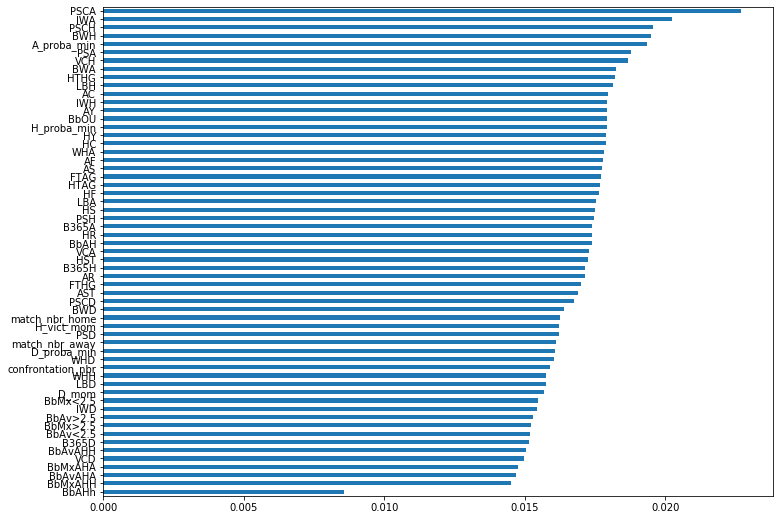

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=50)
model.fit(X, y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values()
feat_importances.plot(kind='barh',legend=False,figsize=(12,9))
plt.show()

## PCA

After the PCA it seems that not much additional information is added after the 30th component so we limit ourself to the use of the thirty first components in our models in order to try to reduce overfitting.

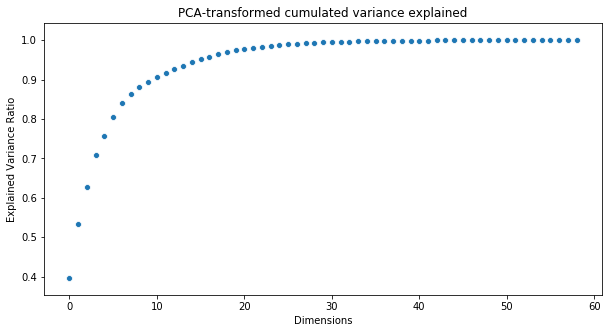

(8774, 30)

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X = pca.transform(X)
Cum_explained_Var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=Cum_explained_Var)
ax.set(xlabel='Dimensions', ylabel='Explained Variance Ratio')
plt.title("PCA-transformed cumulated variance explained")
plt.show()
# from the 30th component, we don't really add information
X = X[:,:30]
X.shape

# Classification

We will test 5 models that supports multiclass classification:
* K-Nearest Neighbors
* Logistic regression
* Support Vector Machine (SVM)
* Random forest
* Naïve Bayes

## Model Construction

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, plot_confusion_matrix, classification_report, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.25)

classifier_names = ['clf_KNN','clf_logistic', 'clf_SVC', 'clf_RF', 'clf_GNB']

clf_KNN = KNeighborsClassifier()
clf_logistic = LogisticRegression(multi_class = "ovr", class_weight = 'balanced')
clf_SVC = SVC(class_weight = 'balanced',probability=True)
clf_RF = RandomForestClassifier(class_weight = 'balanced')
clf_GNB = GaussianNB()

clf_list = [clf_KNN, clf_logistic, clf_SVC, clf_RF, clf_GNB]

param_KNN = {'n_neighbors': [9, 10, 11]}
param_logistic = {'C': np.logspace(-3,1,5)}
param_SVC = {'C': [6,8,12,20]}
param_RF = {'n_estimators':[10,50],'max_depth':[10,50], 'max_features':['auto', 'log2'],'min_samples_split':[2,5]}
param_GNB = {}

param_list = [param_KNN, param_logistic, param_SVC, param_RF, param_GNB]

CrossVal_dict = {clf_name:{'Classifier':clf,'Hyperparameter':param} for clf_name,clf,param
                 in zip(classifier_names,clf_list,param_list)}

## Model selection

#### Hyperparameters
Most of our model contains hyperparameter that must be tuned using cross-validation in order to reduce the overfitting. These hyperparameters are:
* K-Nearest Neighbors hyperparameters: 
  - number of neighbors used in the KNN algorithm: the smaller this number is, the more the model is prone to           overfitting
* Logistic regression hyperparameters:
  - $\lambda\equiv 1/C$: coefficient of the L2 regularization term: $L_{logL2} = L_{log}+\lambda|w|_2^2$
* Support Vector Machine (SVM) hyperparameters:
  - $\lambda\equiv 1/C$: coefficient of the L2 regularization term: $L_{svmL2} = L_{svm}+\lambda|w|_2^2$
* Random forest hyperparameters:
  - n_estimators: Number of trees in the forest
  - max_depth: maximum depth of the tree (used to prune the tree to avoid overfitting)
  - max_features: the number of features to consider when looking for the best split:
    - If “auto”, then max_features=sqrt(n_features)
    - If “log2”, then max_features=log2(n_features)
  - min_samples_split: the minimum number of samples required to split an internal node


We could have considered using L1 regularization instead of L2, to encourage sparsity.

#### Metrics
The metrics with respect to which the hyperparameters are tuned are described below:
* The F1 score suited for unbalanced classes:$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$
where $Precision = \frac{TP}{TP + FP}$ and $Recall = \frac{TP}{TP+FN}$
* The rank probability score specially designed for this classification problem:
$$ R P S=\frac{1}{2} \sum_{i=1}^{2}\left(\sum_{j=1}^{i}\left(p_{j}-e_{j}\right)\right)^{2}$$
where $e_j$ takes the value 1 when the outcome correspond to the $j^{th}$ category in $\{A,D,H\}$

The F1 score should be maximised, while the RPS should be minimized. Because sklearn algorithms for cross validation are designed to maximize the score function, a minus sign will be add in front of the RPS. Therefore the best PRS will be the smallest one in absolute value or the largest one if we consider the minus sign.

In [17]:
def custom_score_fct(y_true,y_pred):
    '''
    Rank Probability score
    :param y_true: (n_sample,) vector of true class A, D or H
    :param y_pred: (n_sample,n_class) matrix of proba of the respective class A, D, or H
    :return: score
    '''
    n_sample = y_pred.shape[0]
    e1 = np.ones(n_sample) * (y_true == 'A')
    e2 = np.ones(n_sample) * (y_true == 'D')
    p1 = y_pred[:,0]
    p2 = y_pred[:, 1]
    def RPS(e1,e2,p1,p2):
        return 0.5 * ((p1-e1)**2 + (p1+p2-e1-e2)**2)
    return np.mean(list(map(RPS,e1,e2,p1,p2)))


RPS_score = make_scorer(custom_score_fct,greater_is_better=False,needs_proba=True)


def ModelSelection(CrossVal_dict,score_fct = 'f1_weighted'):
    Best_Classifiers_dict = {}

    for clf in CrossVal_dict.keys():

        CV = GridSearchCV(CrossVal_dict[clf]['Classifier'], scoring=score_fct,
                          param_grid=CrossVal_dict[clf]['Hyperparameter'], cv=5)
        CV = CV.fit(X_train, y_train)
        Best_Classifiers_dict[clf] = {'Classifier': CV.best_estimator_, 'Hyperparameter': CV.best_params_}

    return Best_Classifiers_dict

## Test set result

In [18]:
def DisplayResults(Best_Classifiers_dict,X_test,y_test):
    Score_Comparison_df = pd.DataFrame(index=Best_Classifiers_dict.keys(),columns=['F1_weighted_Score','RPS'])
    for clf in Best_Classifiers_dict.keys():
        print('###############################################################')
        plot_confusion_matrix(Best_Classifiers_dict[clf]['Classifier'], X_test, y_test, cmap="YlGnBu",
                              values_format='.0f')
        plt.title('Confusion matrix ' + clf)
        plt.show()
        print('Classification report of ', clf)
        print(classification_report(y_test, Best_Classifiers_dict[clf]['Classifier'].predict(X_test)))
        print('Rank probability score: {:.2f}'.format(
            RPS_score(Best_Classifiers_dict[clf]['Classifier'], X_test, y_test)))
        print('###############################################################')
        Score_Comparison_df.loc[clf, 'F1_weighted_Score'] = f1_score(y_test, Best_Classifiers_dict[clf]['Classifier']
                                                                       .predict(X_test),average='weighted')
        Score_Comparison_df.loc[clf, 'RPS'] = RPS_score(Best_Classifiers_dict[clf]['Classifier'], X_test, y_test)

    Score_Comparison_df.abs().plot.barh(figsize=(8,6),grid=True)

The cross validation (5 folds) for each model is performed on the train set. Then each model with their optimal hyperparameter is tested on the test set. Their score for a variety of metrics are provided for each model as well as their confusion matrix in addition to a comparative bar chart of the F1-score and RPS.

We do this using the F1-score for the cross validation and then repeat it using the RPS. Hence we end-up with ten models in total. Five whose hyperparameters have been tuned using a 5-fold cross-validation based on the F1-score and five whose hyperparameters have been tuned using a 5-fold cross-validation based on the Rank probability score.

### Using F1_score metric

In [19]:
Best_Classifiers_dict = ModelSelection(CrossVal_dict)

###############################################################


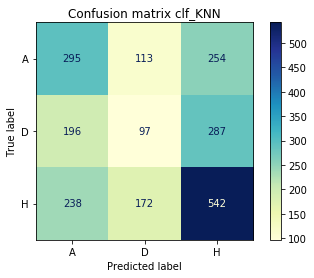

Classification report of  clf_KNN
              precision    recall  f1-score   support

           A       0.40      0.45      0.42       662
           D       0.25      0.17      0.20       580
           H       0.50      0.57      0.53       952

    accuracy                           0.43      2194
   macro avg       0.39      0.39      0.39      2194
weighted avg       0.41      0.43      0.41      2194

Rank probability score: -0.23
###############################################################
###############################################################


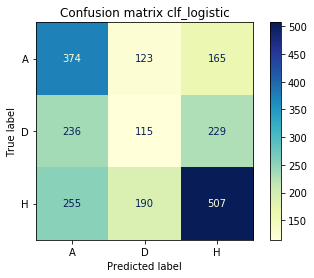

Classification report of  clf_logistic
              precision    recall  f1-score   support

           A       0.43      0.56      0.49       662
           D       0.27      0.20      0.23       580
           H       0.56      0.53      0.55       952

    accuracy                           0.45      2194
   macro avg       0.42      0.43      0.42      2194
weighted avg       0.45      0.45      0.45      2194

Rank probability score: -0.22
###############################################################
###############################################################


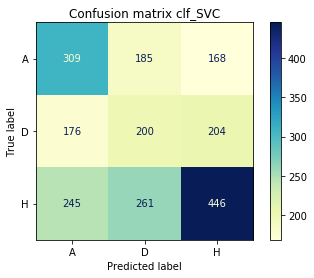

Classification report of  clf_SVC
              precision    recall  f1-score   support

           A       0.42      0.47      0.44       662
           D       0.31      0.34      0.33       580
           H       0.55      0.47      0.50       952

    accuracy                           0.44      2194
   macro avg       0.43      0.43      0.42      2194
weighted avg       0.45      0.44      0.44      2194

Rank probability score: -0.22
###############################################################
###############################################################


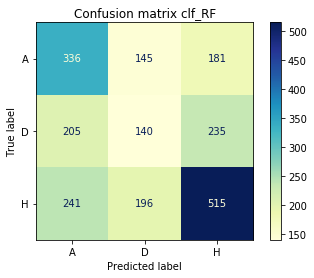

Classification report of  clf_RF
              precision    recall  f1-score   support

           A       0.43      0.51      0.47       662
           D       0.29      0.24      0.26       580
           H       0.55      0.54      0.55       952

    accuracy                           0.45      2194
   macro avg       0.42      0.43      0.43      2194
weighted avg       0.45      0.45      0.45      2194

Rank probability score: -0.22
###############################################################
###############################################################


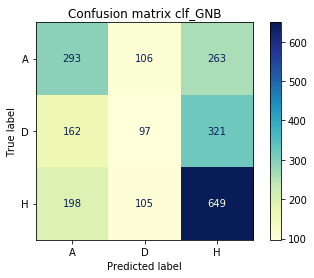

Classification report of  clf_GNB
              precision    recall  f1-score   support

           A       0.45      0.44      0.45       662
           D       0.31      0.17      0.22       580
           H       0.53      0.68      0.59       952

    accuracy                           0.47      2194
   macro avg       0.43      0.43      0.42      2194
weighted avg       0.45      0.47      0.45      2194

Rank probability score: -0.21
###############################################################


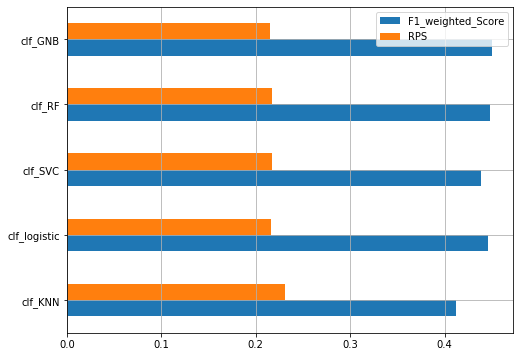

In [20]:
DisplayResults(Best_Classifiers_dict,X_test,y_test)

### Using custom score metric

In [21]:
Best_Classifiers_dict = ModelSelection(CrossVal_dict,score_fct=RPS_score)

###############################################################


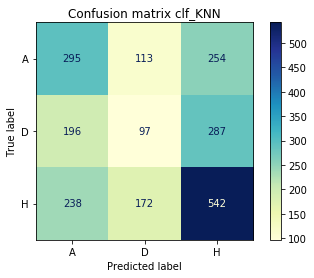

Classification report of  clf_KNN
              precision    recall  f1-score   support

           A       0.40      0.45      0.42       662
           D       0.25      0.17      0.20       580
           H       0.50      0.57      0.53       952

    accuracy                           0.43      2194
   macro avg       0.39      0.39      0.39      2194
weighted avg       0.41      0.43      0.41      2194

Rank probability score: -0.23
###############################################################
###############################################################


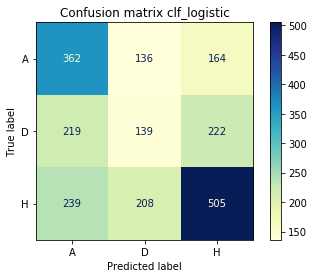

Classification report of  clf_logistic
              precision    recall  f1-score   support

           A       0.44      0.55      0.49       662
           D       0.29      0.24      0.26       580
           H       0.57      0.53      0.55       952

    accuracy                           0.46      2194
   macro avg       0.43      0.44      0.43      2194
weighted avg       0.46      0.46      0.45      2194

Rank probability score: -0.22
###############################################################
###############################################################


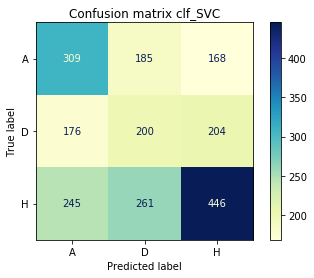

Classification report of  clf_SVC
              precision    recall  f1-score   support

           A       0.42      0.47      0.44       662
           D       0.31      0.34      0.33       580
           H       0.55      0.47      0.50       952

    accuracy                           0.44      2194
   macro avg       0.43      0.43      0.42      2194
weighted avg       0.45      0.44      0.44      2194

Rank probability score: -0.22
###############################################################
###############################################################


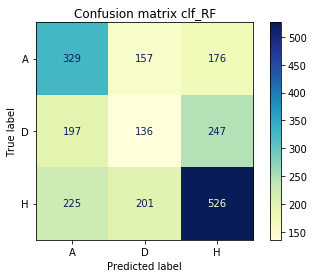

Classification report of  clf_RF
              precision    recall  f1-score   support

           A       0.44      0.50      0.47       662
           D       0.28      0.23      0.25       580
           H       0.55      0.55      0.55       952

    accuracy                           0.45      2194
   macro avg       0.42      0.43      0.42      2194
weighted avg       0.45      0.45      0.45      2194

Rank probability score: -0.22
###############################################################
###############################################################


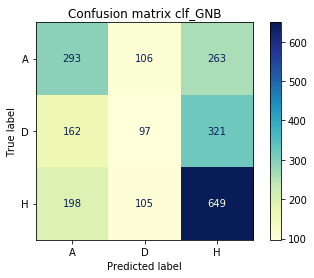

Classification report of  clf_GNB
              precision    recall  f1-score   support

           A       0.45      0.44      0.45       662
           D       0.31      0.17      0.22       580
           H       0.53      0.68      0.59       952

    accuracy                           0.47      2194
   macro avg       0.43      0.43      0.42      2194
weighted avg       0.45      0.47      0.45      2194

Rank probability score: -0.21
###############################################################


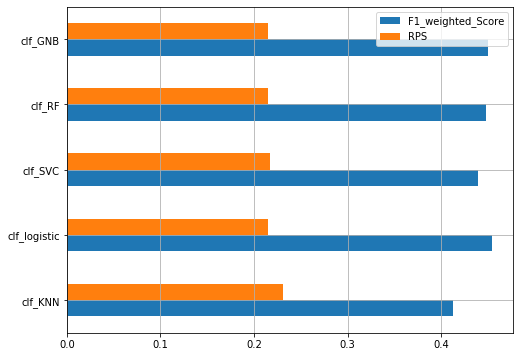

In [22]:
DisplayResults(Best_Classifiers_dict,X_test,y_test)